## Задание 1: Убрать шумы
### Гусев Илья, 294

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from PIL.ImageFilter import UnsharpMask, GaussianBlur, MedianFilter
from PIL import Image

from skimage.filters.rank import median
from skimage.filters import gaussian
from skimage.morphology import disk, square, binary_opening, binary_closing
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from skimage import img_as_uint, img_as_float, img_as_int
from skimage.filters import threshold_otsu

%matplotlib inline

In [109]:
# Вспомогательная функция для отображения картинок в ряд
def show(collection):
    plt.figure()
    fig, ax = plt.subplots(nrows=1, ncols=len(collection), figsize=(10, 10))
    for i in range(len(collection)):
        ax[i].imshow(collection[i])
        ax[i].axis('off')
    plt.show()

original = imread("images/OriginalLena.png")

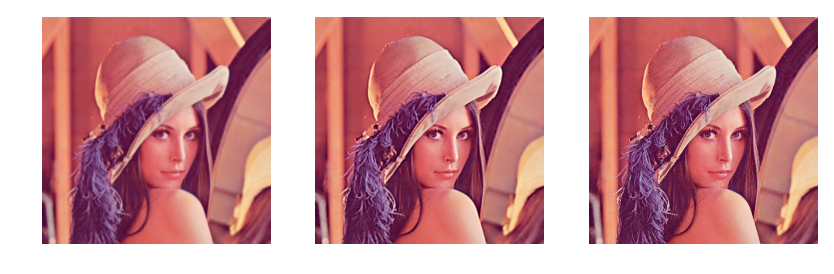

In [110]:
lena3 = Image.open("images/Lena03.jpg") # Убрать Blur
show([lena3, lena3.filter(UnsharpMask), original])

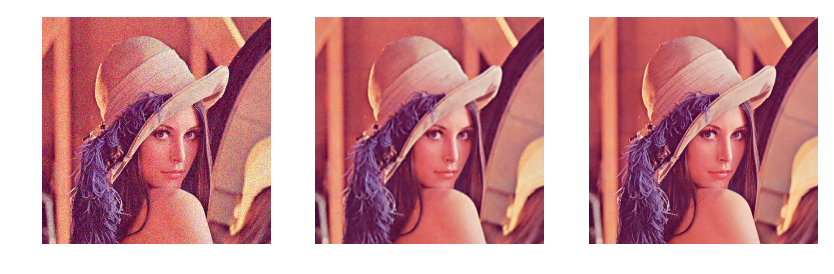

In [111]:
lena1 = Image.open("images/Lena01.jpg") # Убрать случайный шум
show([lena1, lena1.filter(GaussianBlur(2)).filter(UnsharpMask(2)), original])

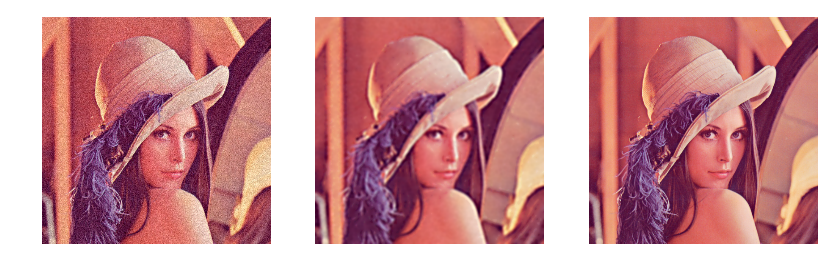

In [112]:
lena2 = Image.open("images/Lena02.jpg") # Убрать сильный случайный шум
show([lena2, lena2.filter(GaussianBlur(3)).filter(UnsharpMask(4)), original])

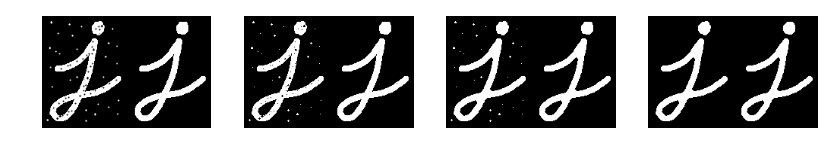

In [113]:
j = imread("images/Lena04.jpg") # Ч/б буква, точечный шум в обе стороны
binarized = np.where(j >= 124, 1, 0)
closing = binary_closing(binarized, disk(2)) # закрываем чёрные дыры в букве
opening = binary_opening(closing, disk(2)) # убираем точки
show([gray2rgb(j), gray2rgb(binarized), gray2rgb(closing), gray2rgb(opening)])

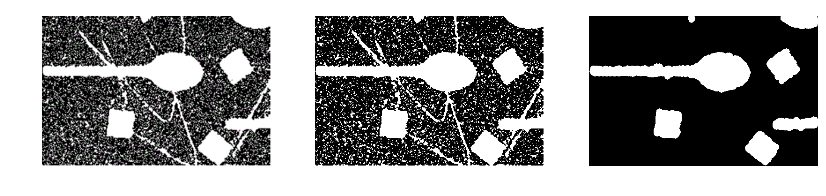

In [114]:
spoon = imread("images/Lena07.GIF") # Ч/б ложки-сахар, импульсный шум, паразитные линии
binarized = np.where(rgb2gray(spoon) > 0.5, 1, 0)
show([spoon, gray2rgb(binarized), gray2rgb(binary_opening(binarized, disk(6)))])

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


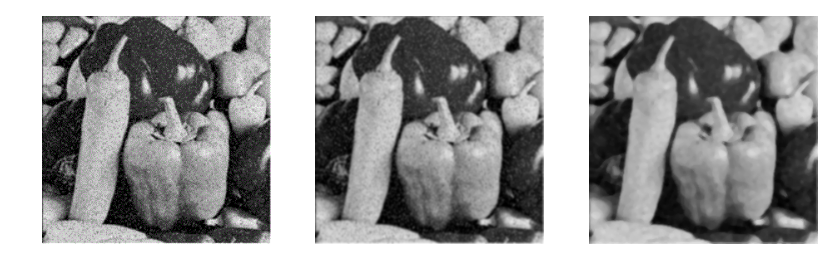

In [115]:
veg = imread("images/Lena06.GIF") # Овощи, импульсный + случайный(?) шум
gaussian1 = gaussian(rgb2gray(veg), sigma=1)
median1 = median(gaussian1, selem=disk(3))
show([veg, gray2rgb(gaussian1), gray2rgb(median1)])